# 0. Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import numpy as np

sns.set_style("darkgrid")
d_order = ['N', 'NNE', 'NE', 'ENE', 
        'E', 'ESE', 'SE', 'SSE', 
        'S', 'SSW', 'SW', 'WSW', 
        'W', 'WNW', 'NW', 'NNW']

In [2]:
readable_mapper = {
    'giaret': 'Giá rét',
    'lanh': 'Lạnh',
    'matme': 'Mát mẻ',
    'amap': 'Ấm áp',
    'nong': 'Nóng',
    'oia': 'Oi ả',
    'emdem': 'Êm đềm',
    'nhe': 'Nhẹ',
    'trungbinh': 'Trung bình',
    'manh': 'Mạnh',
    'khongmua': 'Không mưa',
    'nho': 'Nhỏ',
    'vua': 'Vừa',
    'to': 'To',
    'ratto': 'Rất to',
    'thap': 'Thấp',
    'cao': 'Cao',
    'ratcao': 'Rất cao',
    'trongxanh': 'Trong xanh',
    'comay': 'Có mây',
    'nhieumay': 'Nhiều mây',
    'baophu': 'Mây bao phủ',
    'mb': 'Miền Bắc',
    'dhntb': 'Duyên hải Nam Trung Bộ',
    'tn': 'Tây Nguyên',
    'mn': 'Miền Nam'
}

In [3]:
temp_order = ['giaret', 'lanh', 'matme', 'amap', 'nong', 'oia']
wind_order = ['emdem', 'nhe', 'trungbinh', 'manh']
rain_order = ['khongmua', 'nho', 'vua', 'to', 'ratto']
cloud_order = ['trongxanh', 'comay', 'nhieumay', 'baophu']
humidi_order = ['thap', 'trungbinh', 'cao', 'ratcao']
pressure_order = ['thap', 'trungbinh', 'cao']

In [4]:
def anno_number(ax, lim_ratio = 1.1, dis_ratio = 0.02, font = 11):
    max_height = max([p.get_height() for p in ax.patches])
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + max_height * dis_ratio), fontsize = font, ha = 'center')
    ax.set_ylim(0, max_height * lim_ratio)

def stacking(df, by, value):
    data = df.groupby(by = by)[value].agg('value_counts').unstack(-1).fillna(0)
    data = data.div(data.sum(axis = 1), axis = 0) * 100
    
    return data

In [5]:
vietnam_geo = json.load(open('data/vietnam_state.geojson', 'r'))

In [6]:
df = pd.read_csv('data/weather1.csv')

## 3. Các câu hỏi có ý nghĩa
Ở phần này nhóm sẽ trình bày các câu hỏi có ý nghĩa về dữ liệu thời tiết thu thập được. Đa số các câu hỏi sẽ tập trung vào việc trình bày xu hướng thay đổi của các yếu tố thời tiết, chủ yếu là nhiệt độ và lượng mưa. Biết được sự thay đổi của các yếu tố thời tiết sẽ giúp dự báo chính xác hơn các yếu tố này, phục vụ cho nhiều mục đích (nông nghiệp, dự báo bão, lũ, thiên tai,...)

## 3.1. Câu hỏi 1
Xu hướng thay đổi của nhiệt độ trong 12 năm từ 2009 tới 2020

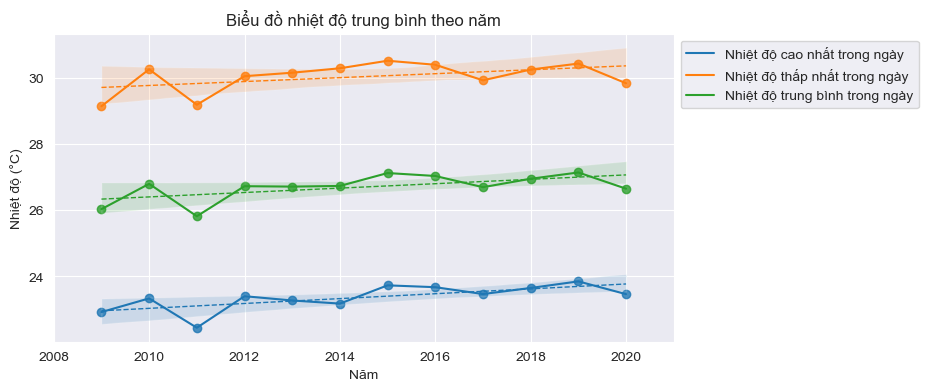

In [29]:
df['mean'] = (df['min'] + df['max']) / 2

data = df.groupby('year')[['min', 'max', 'mean']].mean().reset_index()

fig, ax = plt.subplots(figsize = (8, 4))
sns.regplot(data = data, x = 'year', y = 'min', ax = ax, line_kws = {'ls': '--', 'lw': 1})
sns.regplot(data = data, x = 'year', y = 'max', ax = ax, line_kws = {'ls': '--', 'lw': 1})
sns.regplot(data = data, x = 'year', y = 'mean', ax = ax, line_kws = {'ls': '--', 'lw': 1})

sns.lineplot(data = data, x = 'year', y = 'min', ax = ax, color = 'C0', label = 'Nhiệt độ cao nhất trong ngày')
sns.lineplot(data = data, x = 'year', y = 'max', ax = ax, color = 'C1', label = 'Nhiệt độ thấp nhất trong ngày')
sns.lineplot(data = data, x = 'year', y = 'mean', ax = ax, color = 'C2', label = 'Nhiệt độ trung bình trong ngày')

ax.legend(bbox_to_anchor = (1, 1))

ax.set_title('Biểu đồ nhiệt độ trung bình theo năm')
ax.set_xlabel('Năm')
ax.set_ylabel('Nhiệt độ (°C)')
ax.set_xlim(2008, 2021);

Cả nhiệt độ cao nhất, thấp nhất và trung bình trong ngày theo từng năm đều biến động nhẹ nhưng nhìn chung có xu hướng tăng (đường hồi quy tăng lên theo thời gian)

## 3.2. Câu hỏi 2
Phân tích xu hướng mưa trong 12 năm qua

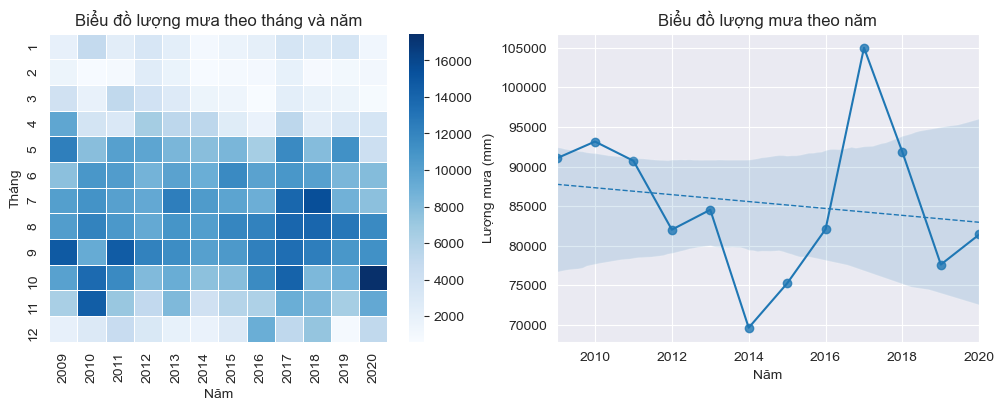

In [30]:
fig, axes = plt.subplots(ncols = 2, figsize = (12, 4))

data = df.groupby(by = ['year', 'month'])['rain'].sum().reset_index()
data = pd.pivot_table(data, index = 'month', columns = 'year', values = 'rain').fillna(0)

sns.heatmap(data, cmap = 'Blues', linewidth = 0.5, linecolor = 'white', ax = axes[0])

data = df.groupby(by = ['year'])['rain'].sum().reset_index()
sns.regplot(data = data, x = 'year', y = 'rain', ax = axes[1], line_kws = {'ls': '--', 'lw': 1})
sns.lineplot(data = data, x = 'year', y = 'rain', ax = axes[1], color = 'C0')

axes[0].set_xlabel('Năm')
axes[0].set_ylabel('Tháng')
axes[0].set_title('Biểu đồ lượng mưa theo tháng và năm')

axes[1].set_xlabel('Năm')
axes[1].set_ylabel('Lượng mưa (mm)')   
axes[1].set_title('Biểu đồ lượng mưa theo năm');

- Tổng lượng mưa theo năm nhìn chung biến động khá thất thường, giảm sâu giai đợn 2010 - 2014, tăng mạnh trở lại tới 2017, sau đó lại giảm tới năm 2020
- Thời điểm lượng mưa tăng trong năm ở 2009 - 2011 là các tháng 9, 10, 11, đến giai đoạn 2016 - 2019 dịch chuyển về các tháng 7, 8, 9. Năm 2020 lượng mưa tăng cao bất thường vào tháng 10

## 3.3. Câu hỏi 3
Phân bổ của các ngày nhiệt độ cao nhất từ 35°C trở lên

Text(998.1222632731254, 0.5, '')

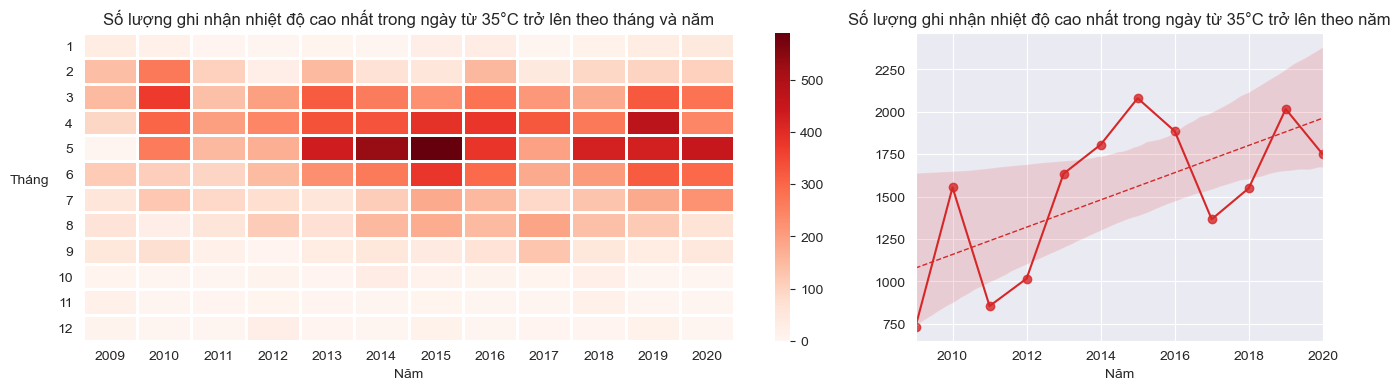

In [31]:
fig, axes = plt.subplots(ncols = 2, figsize = (16, 4), gridspec_kw = {'width_ratios': [2, 1]})
fig.subplots_adjust(wspace = 0.03)

data = df[df['max'] > 34].groupby(['year', 'month'])['max'].count().reset_index()
data = pd.pivot_table(data, index = 'month', columns = 'year', values = 'max').fillna(0)
sns.heatmap(data, cmap = 'Reds', linewidth = 1, linecolor = 'white', ax = axes[0])

data = df[df['max'] > 34]['year'].value_counts().reset_index()
sns.regplot(data = data, x = 'index', y = 'year', color = 'C3', ax = axes[1], line_kws = {'ls': '--', 'lw': 1})
sns.lineplot(data = data, x = 'index', y = 'year', color = 'C3', ax = axes[1])

axes[0].set_title('Số lượng ghi nhận nhiệt độ cao nhất trong ngày từ 35°C trở lên theo tháng và năm')
axes[0].set_xlabel('Năm')
axes[0].set_ylabel('Tháng', rotation = 0, labelpad = 20);
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation = 0)

axes[1].set_title('Số lượng ghi nhận nhiệt độ cao nhất trong ngày từ 35°C trở lên theo năm')
axes[1].set_xlabel('Năm')
axes[1].set_ylabel('')

Số lượng ghi nhận nhiệt độ cao nhất trong ngày từ 35°C trở lên biến động khá thất thường nhưng nhìn chung có xu hướng tăng. Số ngày nóng từ 35°C trở lên từ năm 2013 trở đi luôn cao hơn giai đoạn trước (trừ năm 2017 ghi nhận lượng mưa cao vượt trội, có thể đây là nguyên nhân làm nhiệt độ giả xuống), tập trung chủ yếu vào tháng 4, 5, 6, có xu hướng ngày càng lan rộng ra tháng 3 và tháng 7

## 3.4 Câu hỏi 4
Phân bổ của các ngày nhiệt độ cao nhất đạt từ 20°C trở xuống

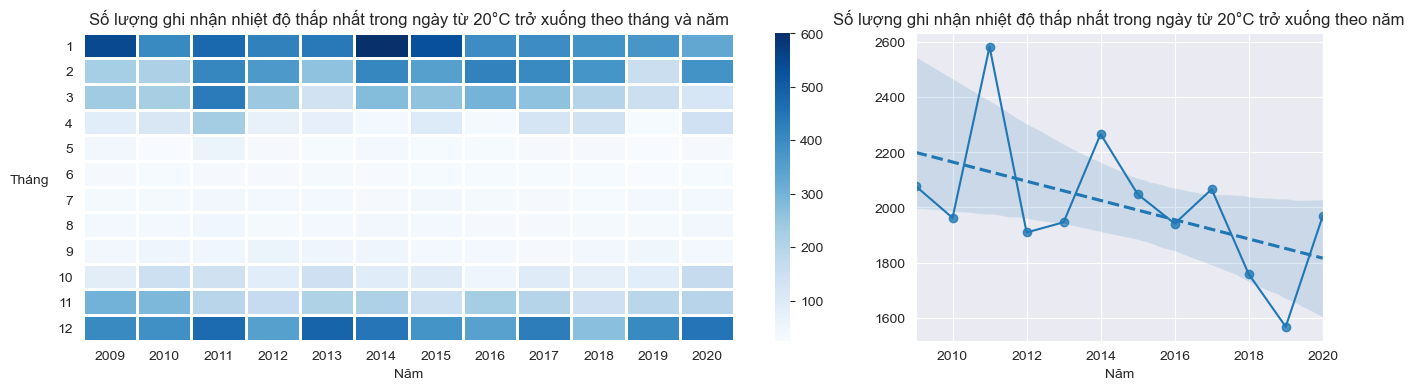

In [25]:
fig, axes = plt.subplots(ncols = 2, figsize = (16, 4), gridspec_kw = {'width_ratios': [2, 1]})
fig.subplots_adjust(wspace = 0.03)

data = df[df['min'] < 20].groupby(['year', 'month'])['min'].count().reset_index()
data = pd.pivot_table(data, index = 'month', columns = 'year', values = 'min').fillna(0)
sns.heatmap(data, cmap = 'Blues', linewidth = 1, linecolor = 'white', ax = axes[0])

data = df[df['min'] < 20]['year'].value_counts().reset_index()
sns.regplot(data = data, x = 'index', y = 'year', color = 'C0', ax = axes[1], line_kws = {'ls': '--', 'lw': 1})
sns.lineplot(data = data, x = 'index', y = 'year', color = 'C0', ax = axes[1])

axes[0].set_title('Số lượng ghi nhận nhiệt độ thấp nhất trong ngày từ 20°C trở xuống theo tháng và năm')
axes[0].set_xlabel('Năm')
axes[0].set_ylabel('Tháng', rotation = 0, labelpad = 20)
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation = 0)

axes[1].set_title('Số lượng ghi nhận nhiệt độ thấp nhất trong ngày từ 20°C trở xuống theo năm')
axes[1].set_xlabel('Năm')
axes[1].set_ylabel('');

Số lượng ghi nhận nhiệt độ thấp nhất trong ngày nhỏ hơn 20°C có xu hướng giảm xuống, thu dần tập trung vào tháng 12, 1 và 2. Giai đoạn 2009 - 2012, số lượng các ghi nhận này có biên độ biến độ khá rộng, thu hẹp dần vào giai đoạn 2014 - 2020. 

## 3.5. Câu hỏi 5
Số ngày liên tiếp nhiệt độ cao nhất trong ngày đạt từ 35°C trở lên và nhiệt độ thấp nhất trong ngày đạt từ 20°C trở xuống ở từng vùng miền

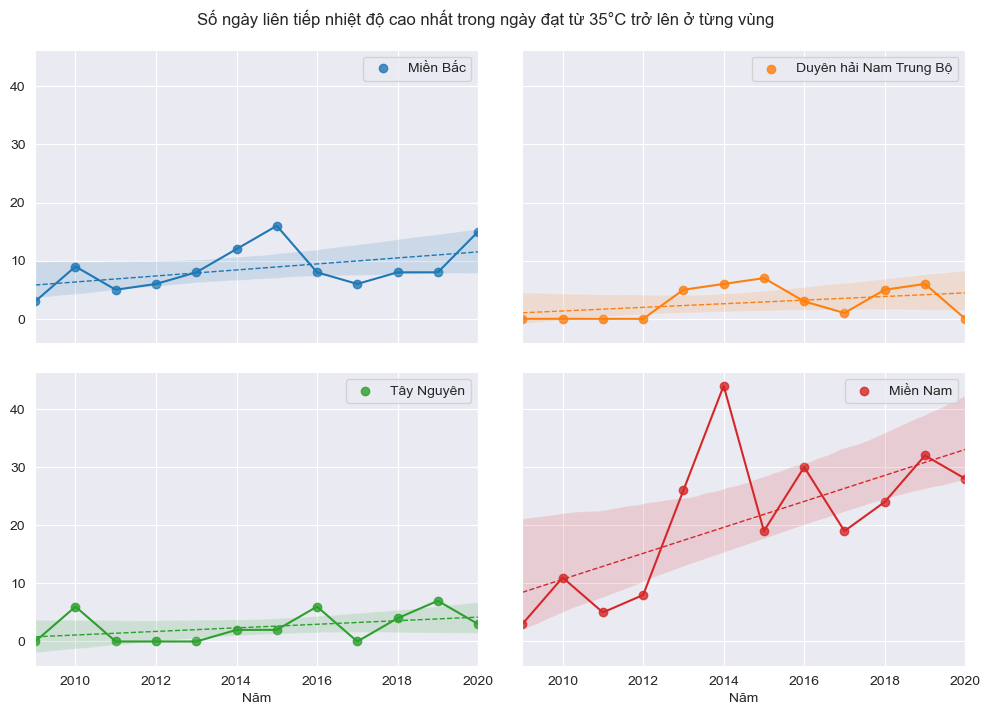

In [38]:
def get_maxlen(year):
    d = data[data['year'] == year]['max'].values

    maxlen = 0
    currlen = 0
    if d[0] == 0: 
        maxlen = 1
        currlent = 1
    for i in range(1, len(d)):
        if (d[i] > 34) and (d[i - 1] > 34):
            currlen += 1
        else:
            if currlen > maxlen:
                maxlen = currlen
            currlen = 0
    
    return maxlen

fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (12, 8), sharex = True, sharey = True)
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)

data = df[df['region'] == 'mb'].groupby('date')['max'].mean().reset_index()
data['date'] = data['date'].astype('datetime64[ns]')
data['year'] = data['date'].dt.year

x = data['year'].value_counts().reset_index().sort_values('index')['index']
y = data['year'].value_counts().reset_index().sort_values('index').apply(lambda x: get_maxlen(x['index']), axis = 1).values

sns.regplot(x = x, y = y, color = 'C0', label = 'Miền Bắc', ax = axes[0, 0], line_kws = {'ls': '--', 'lw': 1})
sns.lineplot(x = x, y = y, color = 'C0', ax = axes[0, 0])

data = df[df['region'] == 'dhntb'].groupby('date')['max'].mean().reset_index()
data['date'] = data['date'].astype('datetime64[ns]')
data['year'] = data['date'].dt.year

x = data['year'].value_counts().reset_index().sort_values('index')['index']
y = data['year'].value_counts().reset_index().sort_values('index').apply(lambda x: get_maxlen(x['index']), axis = 1).values

sns.regplot(x = x, y = y, color = 'C1', label = 'Duyên hải Nam Trung Bộ', ax = axes[0, 1], line_kws = {'ls': '--', 'lw': 1})
sns.lineplot(x = x, y = y, color = 'C1', ax = axes[0, 1])

data = df[df['region'] == 'tn'].groupby('date')['max'].mean().reset_index()
data['date'] = data['date'].astype('datetime64[ns]')
data['year'] = data['date'].dt.year

x = data['year'].value_counts().reset_index().sort_values('index')['index']
y = data['year'].value_counts().reset_index().sort_values('index').apply(lambda x: get_maxlen(x['index']), axis = 1).values

sns.regplot(x = x, y = y, color = 'C2', label = 'Tây Nguyên', ax = axes[1, 0], line_kws = {'ls': '--', 'lw': 1})
sns.lineplot(x = x, y = y, color = 'C2', ax = axes[1, 0])

data = df[df['region'] == 'mn'].groupby('date')['max'].mean().reset_index()
data['date'] = data['date'].astype('datetime64[ns]')
data['year'] = data['date'].dt.year

x = data['year'].value_counts().reset_index().sort_values('index')['index']
y = data['year'].value_counts().reset_index().sort_values('index').apply(lambda x: get_maxlen(x['index']), axis = 1).values

sns.regplot(x = x, y = y, color = 'C3', label = 'Miền Nam', ax = axes[1, 1], line_kws = {'ls': '--', 'lw': 1})
sns.lineplot(x = x, y = y, color = 'C3', ax = axes[1, 1])

axes[0, 0].set_xlabel('')
axes[0, 1].set_xlabel('')
axes[1, 0].set_xlabel('Năm')
axes[1, 1].set_xlabel('Năm')

st = fig.suptitle('Số ngày liên tiếp nhiệt độ cao nhất trong ngày đạt từ 35°C trở lên ở từng vùng')
st.set_y(0.93)

Nhìn chung số ngày liên tiếp nhiệt độ cao nhất trong ngày đạt từ 35°C ở các vùng vào từ dưới 10 tới dưới 20 ngày và có xu hướng tăng, riêng Miền Nam có số ngày nóng liên tiếp gần như luôn cao hơn 10 độ và xu hướng tăng cao hơn hẳn so với các vùng khác. 

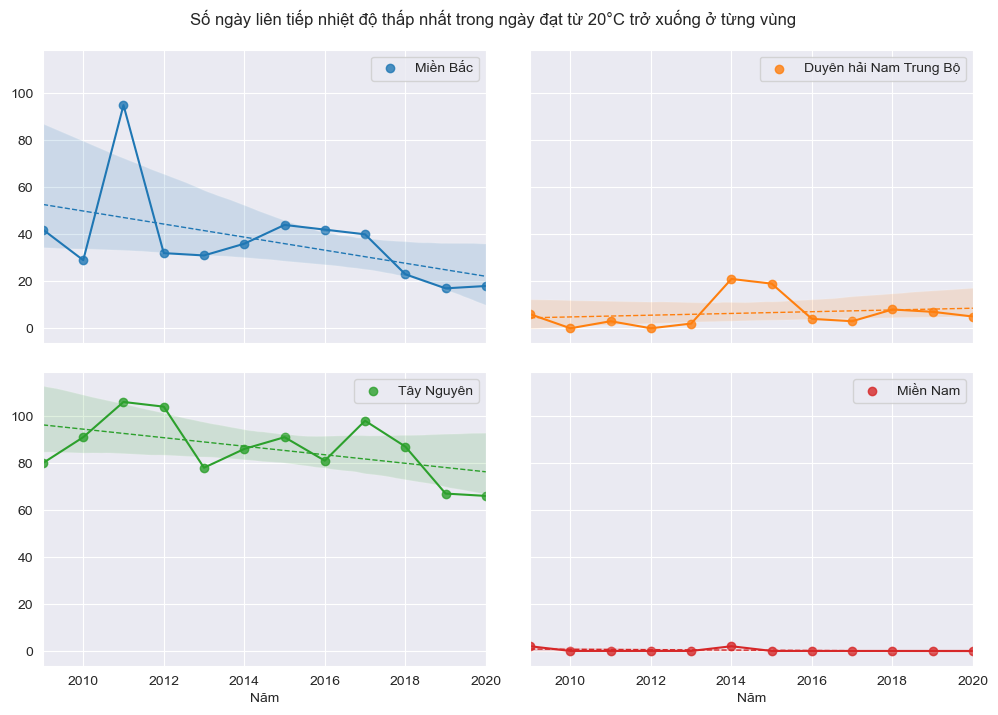

In [39]:
def get_maxlen(year):
    d = data[data['year'] == year]['min'].values

    maxlen = 0
    currlen = 0
    if d[0] < 20: 
        maxlen = 1
        currlent = 1
    for i in range(1, len(d)):
        if (d[i] < 20) and (d[i - 1] < 20):
            currlen += 1
        else:
            if currlen > maxlen:
                maxlen = currlen
            currlen = 0
    
    return maxlen

fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (12, 8), sharex = True, sharey = True)
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)

data = df[df['region'] == 'mb'].groupby('date')['min'].mean().reset_index()
data['date'] = data['date'].astype('datetime64[ns]')
data['year'] = data['date'].dt.year

x = data['year'].value_counts().reset_index().sort_values('index')['index']
y = data['year'].value_counts().reset_index().sort_values('index').apply(lambda x: get_maxlen(x['index']), axis = 1).values

sns.regplot(x = x, y = y, color = 'C0', label = 'Miền Bắc', ax = axes[0, 0], line_kws = {'ls': '--', 'lw': 1})
sns.lineplot(x = x, y = y, color = 'C0', ax = axes[0, 0])

data = df[df['region'] == 'dhntb'].groupby('date')['min'].mean().reset_index()
data['date'] = data['date'].astype('datetime64[ns]')
data['year'] = data['date'].dt.year

x = data['year'].value_counts().reset_index().sort_values('index')['index']
y = data['year'].value_counts().reset_index().sort_values('index').apply(lambda x: get_maxlen(x['index']), axis = 1).values

sns.regplot(x = x, y = y, color = 'C1', label = 'Duyên hải Nam Trung Bộ', ax = axes[0, 1], line_kws = {'ls': '--', 'lw': 1})
sns.lineplot(x = x, y = y, color = 'C1', ax = axes[0, 1])

data = df[df['region'] == 'tn'].groupby('date')['min'].mean().reset_index()
data['date'] = data['date'].astype('datetime64[ns]')
data['year'] = data['date'].dt.year

x = data['year'].value_counts().reset_index().sort_values('index')['index']
y = data['year'].value_counts().reset_index().sort_values('index').apply(lambda x: get_maxlen(x['index']), axis = 1).values

sns.regplot(x = x, y = y, color = 'C2', label = 'Tây Nguyên', ax = axes[1, 0], line_kws = {'ls': '--', 'lw': 1})
sns.lineplot(x = x, y = y, color = 'C2', ax = axes[1, 0])

data = df[df['region'] == 'mn'].groupby('date')['min'].mean().reset_index()
data['date'] = data['date'].astype('datetime64[ns]')
data['year'] = data['date'].dt.year

x = data['year'].value_counts().reset_index().sort_values('index')['index']
y = data['year'].value_counts().reset_index().sort_values('index').apply(lambda x: get_maxlen(x['index']), axis = 1).values

sns.regplot(x = x, y = y, color = 'C3', label = 'Miền Nam', ax = axes[1, 1], line_kws = {'ls': '--', 'lw': 1})
sns.lineplot(x = x, y = y, color = 'C3', ax = axes[1, 1])

axes[0, 0].set_xlabel('')
axes[0, 1].set_xlabel('')
axes[1, 0].set_xlabel('Năm')
axes[1, 1].set_xlabel('Năm')

st = fig.suptitle('Số ngày liên tiếp nhiệt độ thấp nhất trong ngày đạt từ 20°C trở xuống ở từng vùng')
st.set_y(0.93)

Nhìn chung chuỗi ngày liên tiếp nhiệt độ thấp nhất trong ngày đạt từ 20°C trở xuống có xu hướng giảm ở các vùng, trừ Duyên hải Nam Trung Bộ tăng nhẹ.

Việc số lượng ghi nhận nhiệt độ cao nhất trong ngày và số ngày liên tiếp nhiệt độ cao nhất trong ngày đạt từ 35°C trở lên ngày càng tăng cũng như số lượng ghi nhận nhiệt độ thấp nhất trong ngày và số ngày liên tiếp nhiệt độ thấp nhất trong ngày dạt từ 20°C trở xuống ngày càng giảm xuống là một dấu hiệu của việc nước ta đang bị ảnh hưởng bởi biến đổi khí hậu